<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH_BV/blob/main/MatheSH_Bildverarbeitung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[[0.  0.  0. ]
  [0.  0.  1. ]
  [0.  1.  0. ]
  [1.  0.  0. ]
  [1.  1.  0. ]
  [1.  0.  1. ]
  [0.  1.  1. ]
  [1.  1.  1. ]
  [0.5 0.5 0.5]]]


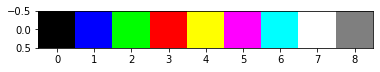

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
imgdata = np.array([[0,0,0],[0,0,1],[0,1,0],[1,0,0],[1,1,0],[1,0,1],[0,1,1],[1,1,1],3*[0.5]])
#img = imgdata.reshape((3,3,3))
img = np.expand_dims(imgdata, axis=0)
print(img)

plt.figure()
plt.imshow(img)
plt.show()

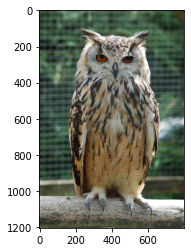

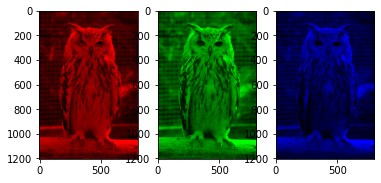

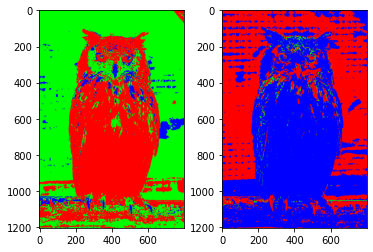

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Bengalese_Eagle_Owl.jpg/800px-Bengalese_Eagle_Owl.jpg"
img = io.imread(image_url)/255#[::2,::2,:]/255

plt.figure()
plt.imshow(img)
plt.show()

base = np.zeros(img.shape)
#print(base)
R = base.copy()
R[:,:,0] = img[:,:,0]
G = base.copy()
G[:,:,1] = img[:,:,1]
B = base.copy()
B[:,:,2] = img[:,:,2]

plt.figure()
plt.subplot(1,3,1)
plt.imshow(R)
plt.subplot(1,3,2)
plt.imshow(G)
plt.subplot(1,3,3)
plt.imshow(B)
plt.show()

test1 = base.copy()
test1[np.argmax(img, axis=-1)==0, 0] = 1
test1[np.argmax(img, axis=-1)==1, 1] = 1
test1[np.argmax(img, axis=-1)==2, 2] = 1
test2 = base.copy()
test2[np.argmin(img, axis=-1)==0, 0] = 1
test2[np.argmin(img, axis=-1)==1, 1] = 1
test2[np.argmin(img, axis=-1)==2, 2] = 1

plt.figure()
plt.subplot(1,2,1)
plt.imshow(test1)
plt.subplot(1,2,2)
plt.imshow(test2)
plt.show()

(1024, 1024, 3)
(3, 3, 1)
[[-2.  0.  2.]
 [ 0.  0.  0.]
 [ 2.  0. -2.]]
(1024, 1024, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


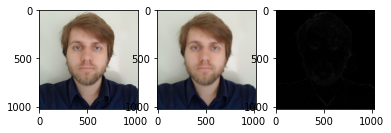

(1024, 1024, 1)


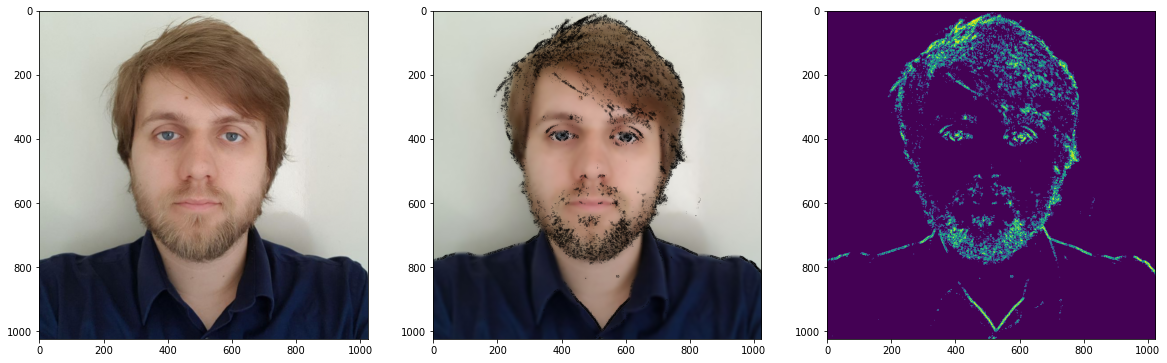

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def pad_dat_boi(img, n=10):
    h, w, c = img.shape
    padded = np.zeros((h+2*n,w+2*n, c))
    padded[n:h+n, n:w+n] = img
    padded[:n,n:w+n] = img[:n][::-1]
    padded[h+n:,n:w+n] = img[h-n:][::-1]
    padded[:,:n] = padded[:,2*n:n:-1]
    padded[:,n+w-1:] = padded[:,n+w-1:w-2:-1]
    return padded

def conv(img, kernel):
    h, w, c = img.shape
    print(img.shape)
    k = kernel.shape[0]
    img_padded = pad_dat_boi(img, n=int(k/2))
    out = np.zeros((h, w, c))

    #for cc in range(c):
    for xx in range(k):
        for yy in range(k):
            out += kernel[xx,yy]*img_padded[xx:h+xx, yy:w+yy]
    return out

def dilate(img, threshfac=.5, k=3):
    kernel = np.ones((k,k))
    out = (conv(np.expand_dims(img, axis=-1), kernel)>threshfac).astype(int).squeeze()
    return out

def erode(img, threshfac=.8, k=3):
    kernel = np.ones((k,k))
    #out = 1-(conv(np.expand_dims(img, axis=-1), kernel)<threshfac).astype(int).squeeze()
    out = conv(np.expand_dims(img, axis=-1), kernel).squeeze()
    out[out>threshfac] = 1
    out[out<=threshfac] = 0
    out = img*out
    return out




image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Bengalese_Eagle_Owl.jpg/800px-Bengalese_Eagle_Owl.jpg"
image_url = "https://profile-images.xing.com/images/0f55ef8faa011ab933ef926941569c18-1/hans-oliver-hansen.1024x1024.jpg"
#image_url = "https://www.zooplus.de/magazin/wp-content/uploads/2019/06/berger-blanc-suisse-1024x683.jpeg"
img = io.imread(image_url)/255#[::2,::2,:]/255
"""print(img.shape)
padded = pad_dat_boi(img,n=50)
print(np.argmin(padded[0,:,0]))

plt.figure()
plt.imshow(padded)
plt.show()
"""
k_size = 11
kernel1 = np.ones((k_size,k_size))/k_size**2
out1 = conv(img, kernel1)
kernel2 = np.expand_dims(np.array([[1,0,-1], [2,0,-2], [1,0,-1]]), axis=-1)
kernel2 = conv(kernel2, kernel2.squeeze().T).squeeze()
print(kernel2)
out2 = conv(img, kernel2)#+conv(img, kernel2.T)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(out1)
plt.subplot(1,3,3)
plt.imshow(out2)
plt.show()

mask = np.sum(np.abs(out2), axis=2)
mask *= 1/np.max(mask)
mask = (mask>0.1).astype(int)
mask = erode(mask, threshfac=0.9, k=11)
#mask = erode(dilate(mask,k=3), threshfac=0.8, k=5)

plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(out1*np.expand_dims(1-mask, axis=-1))
#plt.imshow(out1+0.1*np.expand_dims(np.sum(out2, axis=-1), axis=-1))
plt.subplot(1,3,3)
plt.imshow(mask)
plt.show()